In [1]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize
from langdetect import detect
import numpy as np
import matplotlib.pyplot as plt
from pandarallel import pandarallel
from spellchecker import SpellChecker
import re


def detect_lang(text):
    """
    Detects the language of a story.

    Parameters
    ----------
    text : str
        The story to be processed.
    Returns
    -------
    lang : str
        The language of the story.
    """
    try:
        return detect(text)
    except:
        return 'unknown'
    
def correct_sentence(text):
    """
    Corrects the spelling of a sentence.

    Parameters
    ----------
    text : str
        The sentence to be processed.
    Returns
    -------
    text : str
        The corrected processed sentence.
    """
    spell = SpellChecker(distance=1)
    text = text.split()
    text_out = ""
    for word in text:
        try:
            text_out += spell.correction(word) + " "
        except:
            text_out += word + " "
    return text_out


def preprocess(text):
    """
    Preprocesses a story into sentences. Corrects the spelling of each sentence.

    Parameters
    ----------
    text : str
        The story to be processed.
    Returns
    -------
    text : str
        The processed story.
    """
    sent_tokenize_list = np.array(sent_tokenize(text))
    sent_tokenize_list = np.vectorize(correct_sentence)(sent_tokenize_list)
    return sent_tokenize_list

def preprocess_without_ac(text):
    """
    Preprocesses a story into sentences.

    Parameters
    ----------
    text : str
        The story to be processed.
    Returns
    -------
    text : str
        The processed story.
    """
    sent_tokenize_list = np.array(sent_tokenize(text))
    return sent_tokenize_list


In [2]:
# Data import
df_ac = pd.read_csv('data/sentiment_analysis.csv')
df = pd.read_csv('data/sentiment_analysis_no_autocorrect.csv')


In [3]:
df_ac

,sentence,negativity,neutrality,positivity,compound
0,I accepted a friend request on Facebook becaus...,0.000,0.452,0.548,0.8176
1,We chatted on Facebook Messenger and did some ...,0.000,1.000,0.000,0.0000
2,We then decided to continue the conversation o...,0.000,1.000,0.000,0.0000
3,"This ""friend"" attempted to develop a close rel...",0.000,1.000,0.000,0.0000
4,After some time they asked me to help them wit...,0.000,0.838,0.162,0.4019
...,...,...,...,...,...
29091,No matter who they say they are or that they h...,0.083,0.677,0.241,0.4939
29092,The old saying goes how can you tell a scammer...,0.254,0.746,0.000,-0.5267
29093,Their lips move... My investigation is complet...,0.000,0.856,0.144,0.4939
29094,BE aware,0.000,1.000,0.000,0.0000


In [4]:
df

,sentence,negativity,neutrality,positivity,compound
0,I accepted a friend request on Facebook becaus...,0.000,0.452,0.548,0.8176
1,We chatted on Facebook Messenger and did some ...,0.000,1.000,0.000,0.0000
2,We then decided to continue the conversation o...,0.000,1.000,0.000,0.0000
3,"This ""friend"" attempted to develop a close rel...",0.000,1.000,0.000,0.0000
4,"After some time, they asked me to help them wi...",0.000,0.838,0.162,0.4019
...,...,...,...,...,...
29091,No matter who they say they are or that they h...,0.083,0.677,0.241,0.4939
29092,The old saying goes: -How can you tell a scamm...,0.254,0.746,0.000,-0.5267
29093,Their lips move... My investigation is complet...,0.000,0.856,0.144,0.4939
29094,BE AWARE!,0.000,1.000,0.000,0.0000


In [5]:
# colorblind friendly colors
colors = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

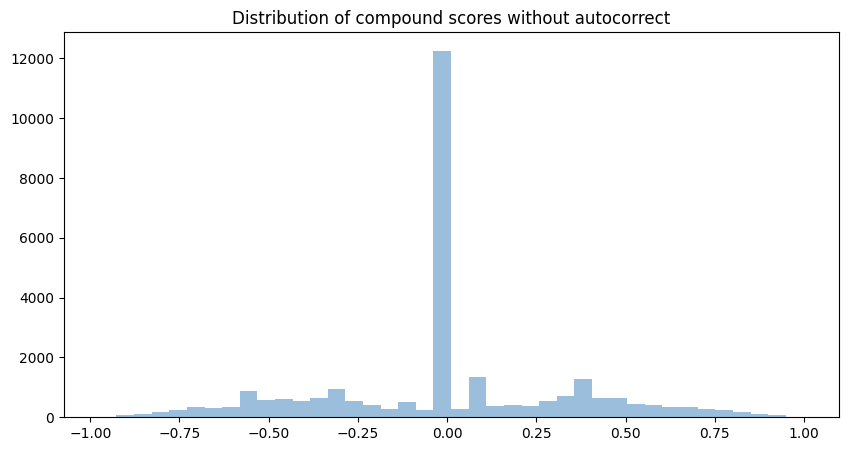

In [6]:
plt.figure(figsize=(10, 5))
plt.hist(df['compound'], bins=40, color=colors[0], alpha=0.5, label='compund score')
plt.title('Distribution of compound scores without autocorrect')
plt.show()

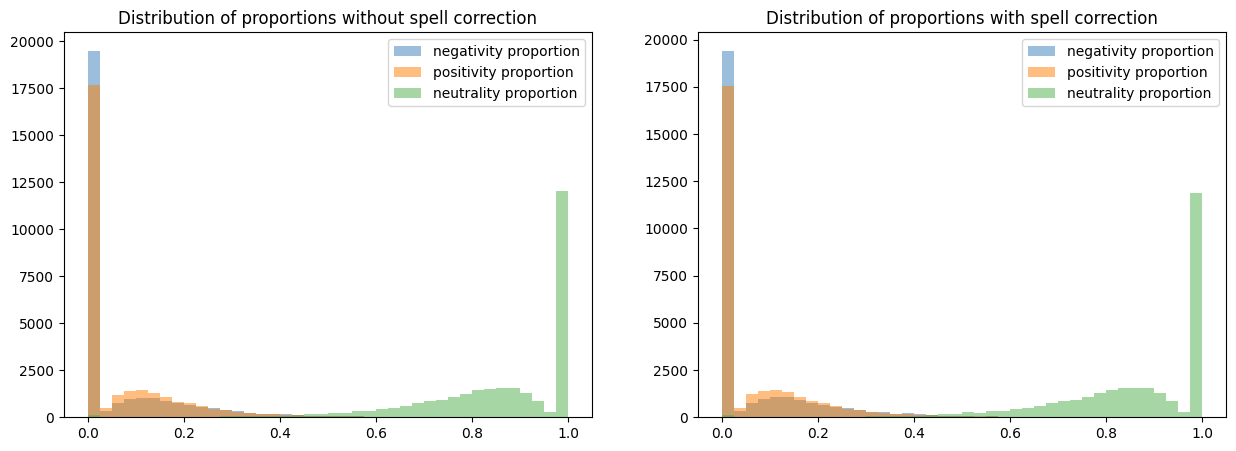

In [7]:
# plot two figures

ax, fig = plt.subplots(1, 2, figsize=(15, 5))

fig[0].hist(df['negativity'], bins=40, color=colors[0], alpha=0.5, label='negativity proportion')
fig[0].hist(df['positivity'], bins=40, color=colors[1], alpha=0.5, label='positivity proportion')
fig[0].hist(df['neutrality'], bins=40, color=colors[2], alpha=0.5, label='neutrality proportion')
fig[0].set_title('Distribution of proportions without spell correction')
fig[1].hist(df_ac['negativity'], bins=40, color=colors[0], alpha=0.5, label='negativity proportion')
fig[1].hist(df_ac['positivity'], bins=40, color=colors[1], alpha=0.5, label='positivity proportion')
fig[1].hist(df_ac['neutrality'], bins=40, color=colors[2], alpha=0.5, label='neutrality proportion')
fig[1].set_title('Distribution of proportions with spell correction')
fig[0].legend()
fig[1].legend()
plt.savefig('../Thesis/Project/thesis/resources/proportions.png')

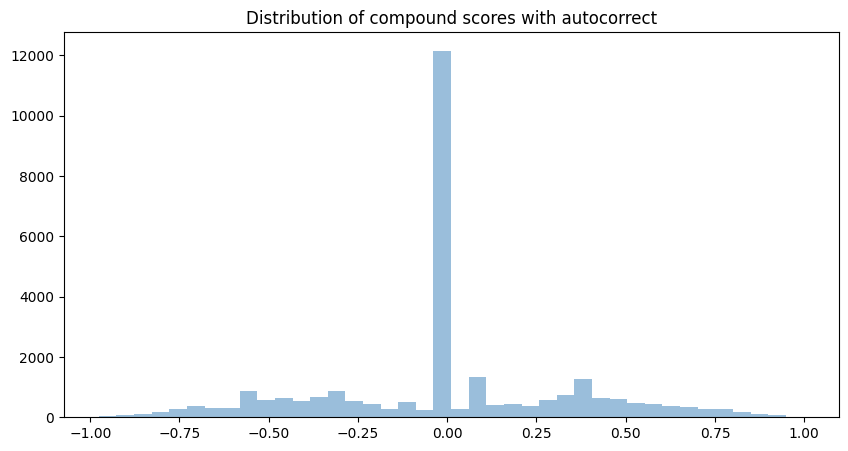

In [8]:
plt.figure(figsize=(10, 5))
plt.hist(df_ac['compound'], bins=40, color=colors[0], alpha=0.5, label='compund score')
plt.title('Distribution of compound scores with autocorrect')
plt.show()

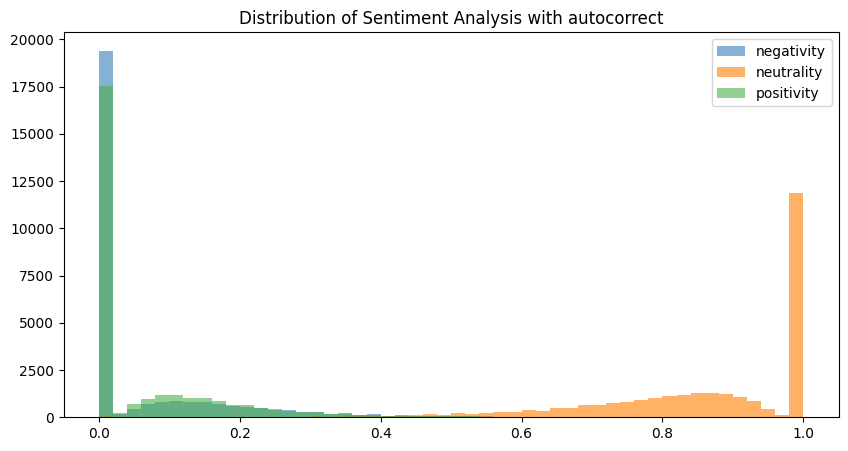

In [9]:
plt.figure(figsize=(10, 5))
plt.hist(df_ac['negativity'], bins=50, alpha=0.6, label='negativity', color=colors[0])
plt.hist(df_ac['neutrality'], bins=50, alpha=0.6, label='neutrality',
         color=colors[1])
plt.hist(df_ac['positivity'], bins=50, alpha=0.6, label='positivity',
         color=colors[2])
plt.legend(loc='upper right')
plt.title('Distribution of Sentiment Analysis with autocorrect')
plt.show()

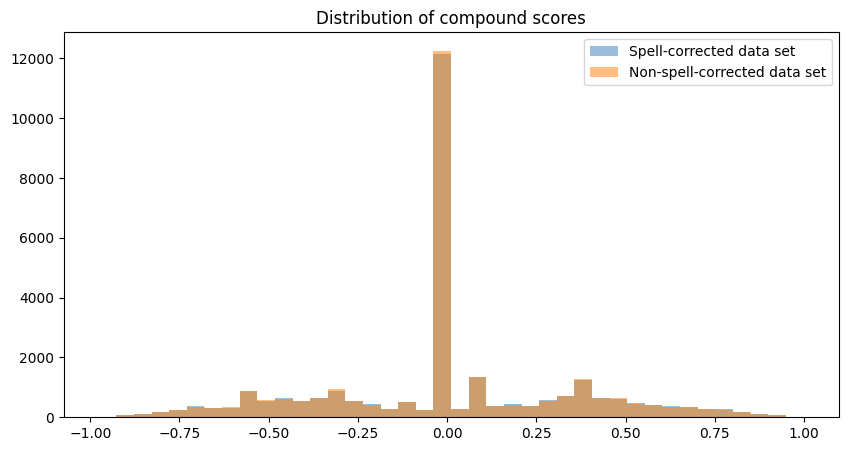

In [10]:
plt.figure(figsize=(10, 5))
plt.hist(df_ac['compound'], bins=40, color=colors[0], alpha=0.5, label='Spell-corrected data set')
plt.hist(df['compound'], bins=40, color=colors[1], alpha=0.5, label='Non-spell-corrected data set')
plt.title('Distribution of compound scores')
plt.legend()
plt.savefig('../Thesis/Project/thesis/resources/compound_scores.png')
plt.show()

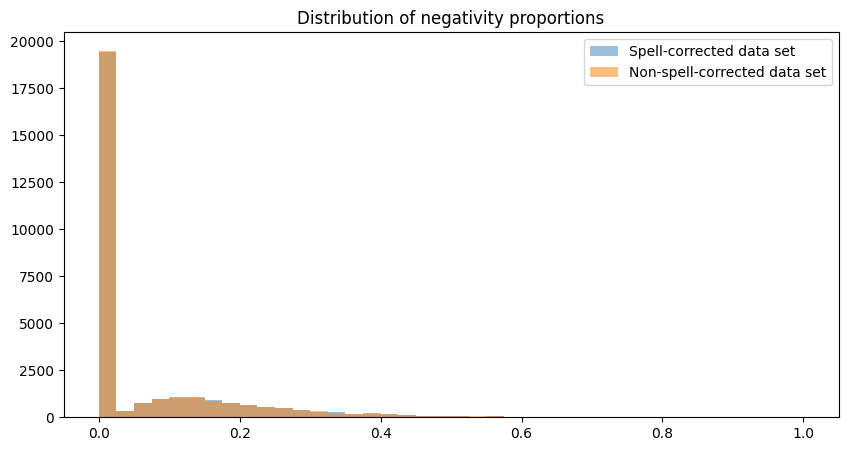

In [11]:
plt.figure(figsize=(10, 5))
plt.hist(df_ac['negativity'], bins=40, color=colors[0], alpha=0.5, label='Spell-corrected data set')
plt.hist(df['negativity'], bins=40, color=colors[1], alpha=0.5, label='Non-spell-corrected data set')
plt.title('Distribution of negativity proportions')
plt.legend()
plt.savefig('../Thesis/Project/thesis/resources/negativity_distributions.png')
plt.show()

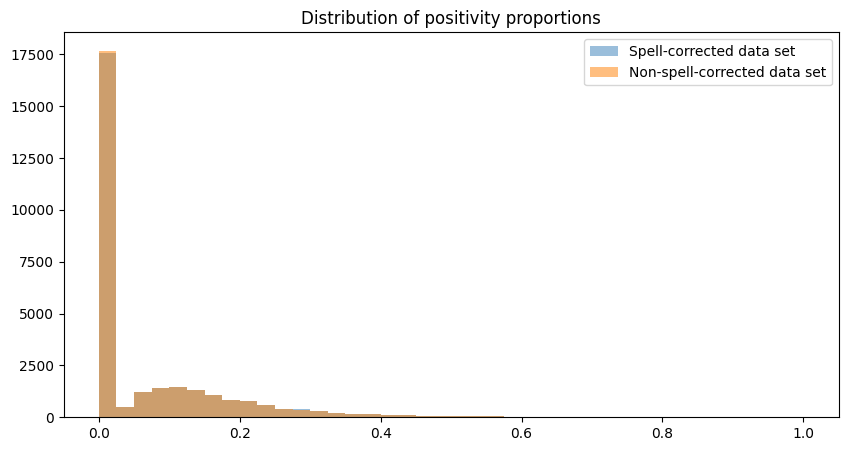

In [12]:
plt.figure(figsize=(10, 5))
plt.hist(df_ac['positivity'], bins=40, color=colors[0], alpha=0.5, label='Spell-corrected data set')
plt.hist(df['positivity'], bins=40, color=colors[1], alpha=0.5, label='Non-spell-corrected data set')
plt.title('Distribution of positivity proportions')
plt.legend()
plt.savefig('../Thesis/Project/thesis/resources/positivity_distributions.png')
plt.show()

In [37]:
data = df['compound'].describe().to_dict()

data['compound_lt_0'] = df[df['compound'] < 0].shape[0]/df['compound'].size
data['compound_gt_0'] = df[df['compound'] > 0].shape[0]/df['compound'].size
data['compound_eq_0'] = df[df['compound'] == 0].shape[0]/df['compound'].size
data['compound_lt_-_0.2'] = df[df['compound'] < -0.2].shape[0]
data['compound_gt_0.2'] = df[df['compound'] > 0.2].shape[0]

data

{'count': 29096.0,
 'mean': 0.0036007801759692063,
 'std': 0.34622808319040055,
 'min': -0.976,
 '25%': -0.1027,
 '50%': 0.0,
 '75%': 0.1326,
 'max': 0.9979,
 'compound_lt_0': 0.2713431399505087,
 'compound_gt_0': 0.31121116304646684,
 'compound_eq_0': 0.4174456970030245,
 'compound_lt_-_0.2': 6781,
 'compound_gt_0.2': 6879}

In [36]:
data_ac = df_ac['compound'].describe().to_dict()

data_ac['compound_lt_0'] = df_ac[df_ac['compound'] < 0].shape[0]/df_ac['compound'].size
data_ac['compound_gt_0'] = df_ac[df_ac['compound'] > 0].shape[0]/df_ac['compound'].size
data_ac['compound_eq_0'] = df_ac[df_ac['compound'] == 0].shape[0]/df_ac['compound'].size
data_ac['compound_lt_-_0.2'] = df_ac[df_ac['compound'] < -0.2].shape[0]
data_ac['compound_gt_0.2'] = df_ac[df_ac['compound'] > 0.2].shape[0]

data_ac

{'count': 29096.0,
 'mean': 0.003500790486664835,
 'std': 0.34808013938408233,
 'min': -0.976,
 '25%': -0.1027,
 '50%': 0.0,
 '75%': 0.1531,
 'max': 0.9977,
 'compound_lt_0': 0.2731303271927413,
 'compound_gt_0': 0.31334204014297495,
 'compound_eq_0': 0.4135276326642838,
 'compound_lt_-_0.2': 6775,
 'compound_gt_0.2': 6941}

In [15]:
# count sentences with negativity score > 0

print(df[df['negativity'] > 0].shape[0])
print(df_ac[df_ac['negativity'] > 0].shape[0])
print(df[df['positivity'] > 0].shape[0])
print(df_ac[df_ac['positivity'] > 0].shape[0])
print(df[df['neutrality'] == 0].shape[0])
print(df_ac[df_ac['neutrality'] == 0].shape[0])

9619
9706
11443
11579
114
123


In [16]:
import statsmodels.api as sm

t_compound = df['compound']
t_compound_ac = df_ac['compound']
t_stat, p_value, _ = sm.stats.ttest_ind(t_compound, t_compound_ac)

In [17]:
p_value

0.9722869802677179

In [18]:
import statsmodels.api as sm

t_negative = df['negativity']
t_negative_ac = df_ac['negativity']

t_positive = df['positivity']
t_positive_ac = df_ac['positivity']

t_neutral = df['neutrality']
t_neutral_ac = df_ac['neutrality']

t_compound = df['compound']
t_compound_ac = df_ac['compound']

t_compound, p_compound, _ = sm.stats.ttest_ind(t_compound, t_compound_ac)
t_negative, p_negative, _ = sm.stats.ttest_ind(t_negative, t_negative_ac)
t_positive, p_positive, _ = sm.stats.ttest_ind(t_positive, t_positive_ac)
t_neutral, p_neutral, _ = sm.stats.ttest_ind(t_neutral, t_neutral_ac)

print("P negativity: ", p_negative)
print("P positivity: ", p_positive)
print("P neutral: ", p_neutral)
print("P compound: ", p_compound)

P negativity:  0.674002291401745
P positivity:  0.40325487314062214
P neutral:  0.2696192915180966
P compound:  0.9722869802677179


In [19]:
from tabulate import tabulate

joined_dfs = pd.DataFrame()
joined_dfs['sentence'] = df['sentence']
joined_dfs['compound'] = df['compound']
joined_dfs['sentence_ac'] = df_ac['sentence']
joined_dfs['compound_ac'] = df_ac['compound']


sample = joined_dfs[joined_dfs['compound_ac'] < joined_dfs['compound']]
print(tabulate(sample[0:50], tablefmt="latex"))

\begin{tabular}{rlrlr}
\hline
   22 & Whatsapp message: Good morning,Aaron here ya😊 I received your application notice from Linkedin, can you confirm with me if you have time?then i will send you the job detail Thank you!                                                                                                         &  0.69   & Whatsapp message Good morning,Aaron here ya I received your application notice from Linkedin, can you confirm with me if you have time?then i will send you the job detail Thank you                                                                                                        &  0.6597 \\
  179 & (PAY NOW).                                                                                                                                                                                                                                                                                       &  0      & pay NOW).                                               

In [20]:
print(tabulate(df[20:21]))

--  --------------------------------------------------------------------------------------------------------------------------  -----  -----  -----  ------
20  When the time came, they resorted to emotional blackmail and questioned my integrity to manipulate me into assisting them.  0.065  0.741  0.194  0.4215
--  --------------------------------------------------------------------------------------------------------------------------  -----  -----  -----  ------


In [21]:
correct_sentence("refunded")

'refunded '

In [24]:
df['negativity'].size

29096